In [16]:
import glob
import matplotlib.pyplot as plt
from matplotlib import cycler
import datetime
import pandas as pd
import os
import helper
import numpy as np
import seaborn as sns
import itertools
import json
import subprocess
from tqdm import tqdm

Text(0.5, 1.0, 'Histogram of test duration')

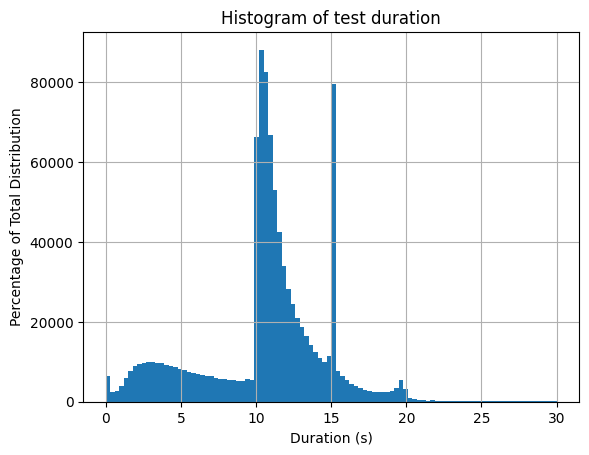

In [17]:
# Directory containing the CSV files
directory = './initial_query_outs/'

# List all CSV files in the specified directory matching the pattern '*.csv'
csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

# Read each CSV file into a dataframe and store in a list
dataframes = [pd.read_csv(f) for f in csv_files]

# Concatenate all dataframes into a single dataframe
df = pd.concat(dataframes, ignore_index=True)

# add a column to the datafram called 'duration' which is the difference between the 'EndTime' and 'StartTime' columns
df['duration'] = pd.to_datetime(df['EndTime']) - pd.to_datetime(df['StartTime'])

# filter out the tests that have duration more than 30s
df = df[df['duration'] < datetime.timedelta(seconds=30)]

# plot a histogram of the duration of the tests
plt.figure()
df['duration'].dt.total_seconds().hist(bins=100)
plt.xlabel('Duration (s)')
plt.ylabel('Percentage of Total Distribution')
plt.title('Histogram of test duration')


Text(0.5, 1.0, 'Duration vs. Throughput')

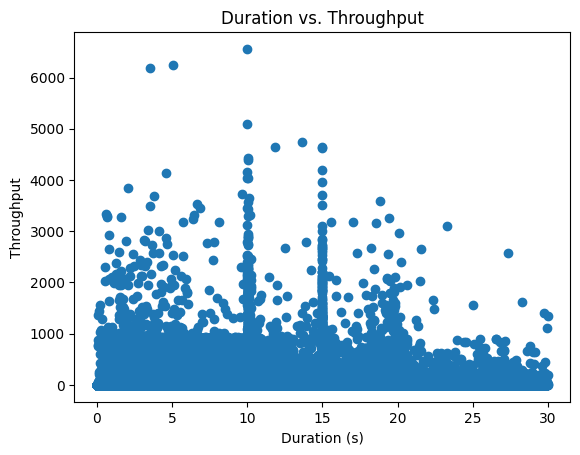

In [18]:
# create a scatterplot of duration vs. throughput result
plt.figure()
plt.scatter(df['duration'].dt.total_seconds(), df['MeanThroughputMbps'])
plt.xlabel('Duration (s)')
plt.ylabel('Throughput')
plt.title('Duration vs. Throughput')

Text(0.5, 1.0, 'Duration vs. Loss Rate')

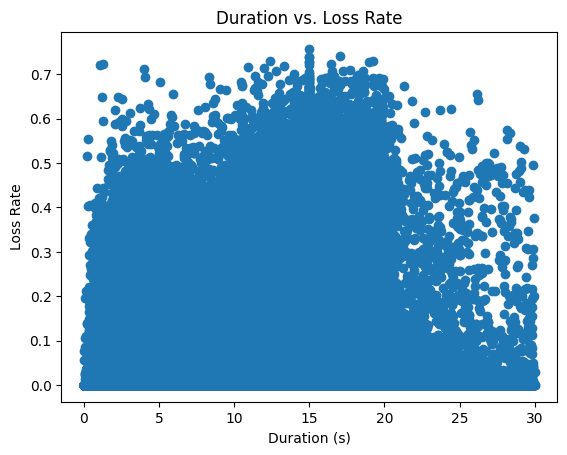

In [19]:
# create a scatterplot of duration vs. LossRate result
plt.figure()
plt.scatter(df['duration'].dt.total_seconds(), df['LossRate'])
plt.xlabel('Duration (s)')
plt.ylabel('Loss Rate')
plt.title('Duration vs. Loss Rate')

In [20]:
# calculate the percentage of tests that are exactly 15 seconds
n_15s = len(df[df['duration'] == datetime.timedelta(seconds=15)])
n_total = len(df)
p_15s = n_15s / n_total
print(f'{p_15s:.5f} of tests are exactly 15 seconds')

# calculate the percentage of tests that are less than 15 seconds
n_less_15s = len(df[df['duration'] < datetime.timedelta(seconds=15)])
p_less_15s = n_less_15s / n_total
print(f'{p_less_15s:.5f} of tests are less than 15 seconds')

# calculate the percentage of tests that are greater than 15 seconds
n_greater_15s = len(df[df['duration'] > datetime.timedelta(seconds=15)])
p_greater_15s = n_greater_15s / n_total
print(f'{p_greater_15s:.5f} of tests are greater than 15 seconds')

# calculate the percentage of tests that are within 0.0001 seconds of 15 seconds
n_15s_plusminus_0_0001s = len(df[(df['duration'] > datetime.timedelta(seconds=14.9999)) & (df['duration'] < datetime.timedelta(seconds=15.0001))])
p_15s_plusminus_0_0001s = n_15s_plusminus_0_0001s / n_total
print(f'{p_15s_plusminus_0_0001s:.5f} of tests are within 0.0001 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.001 seconds of 15 seconds
n_15s_plusminus_0_001s = len(df[(df['duration'] > datetime.timedelta(seconds=14.999)) & (df['duration'] < datetime.timedelta(seconds=15.001))])
p_15s_plusminus_0_001s = n_15s_plusminus_0_001s / n_total
print(f'{p_15s_plusminus_0_001s:.5f} of tests are within 0.001 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.005 seconds of 15 seconds
n_15s_plusminus_0_005s = len(df[(df['duration'] > datetime.timedelta(seconds=14.995)) & (df['duration'] < datetime.timedelta(seconds=15.005))])
p_15s_plusminus_0_005s = n_15s_plusminus_0_005s / n_total
print(f'{p_15s_plusminus_0_005s:.5f} of tests are within 0.005 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.01 seconds of 15 seconds
n_15s_plusminus_0_01s = len(df[(df['duration'] > datetime.timedelta(seconds=14.99)) & (df['duration'] < datetime.timedelta(seconds=15.01))])
p_15s_plusminus_0_01s = n_15s_plusminus_0_01s / n_total
print(f'{p_15s_plusminus_0_01s:.5f} of tests are within 0.01 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.05 seconds of 15 seconds
n_15s_plusminus_0_05s = len(df[(df['duration'] > datetime.timedelta(seconds=14.95)) & (df['duration'] < datetime.timedelta(seconds=15.05))])
p_15s_plusminus_0_05s = n_15s_plusminus_0_05s / n_total
print(f'{p_15s_plusminus_0_05s:.5f} of tests are within 0.05 seconds of 15 seconds')


# calculate the percentage of tests that are within 1 second of 15 seconds
n_15s_plusminus_1s = len(df[(df['duration'] > datetime.timedelta(seconds=14)) & (df['duration'] < datetime.timedelta(seconds=16))])
p_15s_plusminus_1s = n_15s_plusminus_1s / n_total
print(f'{p_15s_plusminus_1s:.5f} of tests are within 1 second of 15 seconds')

# calculate the percentage of tests that are within 2 seconds of 15 seconds
n_15s_plusminus_2s = len(df[(df['duration'] > datetime.timedelta(seconds=13)) & (df['duration'] < datetime.timedelta(seconds=17))])
p_15s_plusminus_2s = n_15s_plusminus_2s / n_total
print(f'{p_15s_plusminus_2s:.5f} of tests are within 2 seconds of 15 seconds')








0.00011 of tests are exactly 15 seconds
0.84931 of tests are less than 15 seconds
0.15059 of tests are greater than 15 seconds
0.01356 of tests are within 0.0001 seconds of 15 seconds
0.06915 of tests are within 0.001 seconds of 15 seconds
0.07453 of tests are within 0.005 seconds of 15 seconds
0.07497 of tests are within 0.01 seconds of 15 seconds
0.07754 of tests are within 0.05 seconds of 15 seconds
0.13489 of tests are within 1 second of 15 seconds
0.20155 of tests are within 2 seconds of 15 seconds


In [21]:
# filter the dataframe to only include tests that are within 0.005 seconds of 15 seconds
df_15s = df[(df['duration'] > datetime.timedelta(seconds=14.995)) & (df['duration'] < datetime.timedelta(seconds=15.005)) & (df['MeanThroughputMbps'] > 0.01)]

df_15s.to_csv('df_15s_plusminus_0_005s.csv', index=False)


In [22]:
# Get ids and dates from the dataframe
ids = df_15s['id'].values
dates = df_15s['date'].unique()

# Define a function to split an array into n parts
def split_into_n_parts(arr, n):
    return np.array_split(arr, n)

# Split the ids and dates into 5 parts
ids_parts = split_into_n_parts(ids, 5)
dates_parts = split_into_n_parts(dates, 5)

# Generate the query parts
queries = []
for i in range(5):
    ids_with_quotes = [f"'{id_}'" for id_ in ids_parts[i]]
    dates_with_quotes = [f"'{date_}'" for date_ in dates_parts[i]]
    query = f"""
    SELECT id, parser.ArchiveURL, parser.Filename 
    FROM `measurement-lab.ndt_raw.pcap` 
    WHERE id IN ({', '.join(ids_with_quotes)}) 
    AND date IN ({', '.join(dates_with_quotes)})
    """
    queries.append(query)

# Print the queries
for idx, query in enumerate(queries):
    print(f"Query part {idx + 1}:\n{query}\n")

# Optionally, save the queries to files
for idx, query in enumerate(queries):
    with open(f'query_part_{idx + 1}.sql', 'w') as file:
        file.write(query)

Query part 1:

    SELECT id, parser.ArchiveURL, parser.Filename 
    FROM `measurement-lab.ndt_raw.pcap` 
    WHERE id IN ('ndt-virtual-pfgnk_1662659132_00000000002CC03A', 'ndt-virtual-rh6d9_1665109590_000000000017157D', 'ndt-virtual-7hw2l_1667603745_000000000007FFBB', 'ndt-virtual-phk22_1665604234_00000000002BE61F', 'ndt-virtual-db2bl_1662669911_000000000014B1BD', 'ndt-virtual-zj5j5_1662587291_00000000001C8689', 'ndt-virtual-phk22_1665604234_00000000002B0BE4', 'ndt-virtual-phk22_1665604234_00000000002B94A9', 'ndt-virtual-7hw2l_1667603745_0000000000089B75', 'ndt-virtual-phk22_1665604234_00000000002AB8D9', 'ndt-virtual-pfgnk_1662659132_00000000002C9349', 'ndt-virtual-7hw2l_1667603745_0000000000086FBE', 'ndt-virtual-wdtsm_1662675154_00000000003E91A6', 'ndt-virtual-7hw2l_1667603745_000000000007ECD9', 'ndt-virtual-wdtsm_1662675154_00000000003E3E15', 'ndt-virtual-db2bl_1662669911_000000000014942C', 'ndt-virtual-phk22_1665604234_00000000002AEBD6', 'ndt-virtual-db2bl_1662669911_0000000000148

In [23]:
# Directory containing the CSV files
download_directory = './download_infos/'

# List all CSV files in the specified directory matching the pattern '*.csv'
download_csv_files = [os.path.join(download_directory, f) for f in os.listdir(download_directory) if f.endswith('.csv')]

# Read each CSV file into a dataframe and store in a list
download_dataframes = [pd.read_csv(f) for f in download_csv_files]

# Concatenate the dataframes
download_info = pd.concat(download_dataframes, ignore_index=True)

# Remove duplicate columns from download_info dataframe
download_info = download_info.loc[:,~download_info.columns.duplicated()]

# Remove duplicate columns from df_15s dataframe
df_15s = df_15s.loc[:,~df_15s.columns.duplicated()]

# Check for overlapping columns (excluding 'id')
common_columns = set(df_15s.columns).intersection(set(download_info.columns)) - {'id'}
print("Common columns (excluding 'id'):", common_columns)

# If there are still any common columns, drop them from one of the dataframes
df_15s = df_15s.drop(columns=common_columns, errors='ignore')

# Join the download_info dataframe with the df_15s dataframe on the 'id' column
df_15s_download_info = df_15s.join(download_info.set_index('id'), on='id')

# Filter out all the rows where the 'ArchiveURL' or 'Filename' column doesn't exist
df_15s_download_info = df_15s_download_info.dropna(subset=['ArchiveURL', 'Filename'])

# Save the joined dataframe to a CSV file
df_15s_download_info.to_csv('df_15s_download_info.csv', index=False)

print("Joined dataframe saved to 'df_15s_download_info.csv'")

Common columns (excluding 'id'): set()
Joined dataframe saved to 'df_15s_download_info.csv'


In [24]:
# return the number of archive urls that have more than one test
archive_urls = df_15s_download_info['ArchiveURL'].value_counts()
archive_urls = archive_urls[archive_urls > 1]
print(f'{len(archive_urls)} archive urls have more than one test')

# low number share archives, we won't optimize for this case



639 archive urls have more than one test


In [25]:
def process_row(row):
    try:
        # Download the archive
        download_command = f"gsutil cp {row['ArchiveURL']} ."
        subprocess.run(download_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Get the name of the archive file from the URL
        archive_filename = row['ArchiveURL'].split('/')[-1]

        # Extract the specified file
        extract_command = f"tar -xzvf {archive_filename} {row['Filename']}"
        subprocess.run(extract_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Move the extracted file to the local 'pcaps' folder
        os.makedirs('pcaps', exist_ok=True)
        move_command = f"mv {row['Filename']} pcaps/"
        subprocess.run(move_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Delete the downloaded archive
        os.remove(archive_filename)
    except subprocess.CalledProcessError as e:
        print(f"Error processing {row['Filename']}: {e}")

In [26]:
# Load the dataframe (assuming it's already loaded)
# df_15s_download_info = pd.read_csv('df_15s_download_info.csv')

# Add a 'processed' column if it doesn't exist
if 'processed' not in df_15s_download_info.columns:
    df_15s_download_info['processed'] = False

# Group by 'date' and select 100 values for each date
rows_to_process = []
for date, group in df_15s_download_info.groupby('date'):
    rows_to_process.extend(group.head(100).to_dict('records'))


# Process rows with a single progress bar
for row in tqdm(rows_to_process, desc="Processing rows"):
    # Skip rows that have already been processed

    process_row(row)
    
    # Mark the row as processed
    df_15s_download_info.loc[
        (df_15s_download_info['ArchiveURL'] == row['ArchiveURL']) & 
        (df_15s_download_info['Filename'] == row['Filename']), 'processed'] = True

# Create a new DataFrame with just the processed rows
processed_df = df_15s_download_info[df_15s_download_info['processed']]

print(processed_df)

Processing rows:   0%|          | 7/22116 [00:50<44:03:10,  7.17s/it]


KeyboardInterrupt: 

In [ ]:
# save the processed_df to a csv file
processed_df.to_csv('processed_df.csv', index=False)